# <span style="color:green"> Esercizio 8 </span>
## <span style="color:blue">  Ottimizzazione variazionale di stato fondamentale</span>


### Lo stato fondamentale di una particella in una doppia buca
In questa lezione affrontiamo il problema di trovare lo stato fondamentale dell'Hamiltoniano 
\begin{eqnarray}
H=\frac{p^2}{2m}+x^4-\frac{5}{2}x^2
\end{eqnarray}
che descrive una particella quantistica in doppia buca di potenziale.

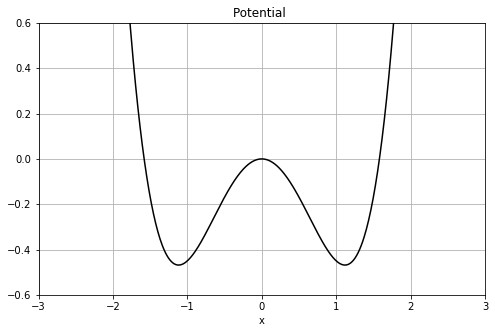

In [77]:
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return (x**2 - 2.5)*x**2
def Psi(x, mu, sigma,psi0):
    return psi0*(np.exp(-0.5*((x - mu) / sigma)**2) +np.exp(-0.5*((x + mu) / sigma)**2)) 

x = np.linspace(-a/2, a/2, N)
V = Vpot(x)

plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") 
plt.title("Potential ")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()

Si tratta di un problema di meccanica quantistica elementare, che trova applicazione ad esempio nella descrizione della dinamica della molecola di ammoniaca. Qui, infatti, un atomo di sodio è vincolato a muoversi in una doppia buca di potenziale creata dagli atomi di idrogeno circostanti.

![Image Title](https://readingpenrose.files.wordpress.com/2015/11/capture2.gif)

Trovare lo stato fondamentale dell'Hamiltoniano
\begin{eqnarray}
H=\frac{p^2}{2m}+x^4-\frac{5}{2}x^2
\end{eqnarray}
significa trovare il minimo del valore di aspettazione
\begin{eqnarray}
\langle\Psi|H|\Psi\rangle
    &=&\int_{-\infty}^\infty
    \Psi(x)^*
    \left(\frac{p^2}{2m}+x^4-\frac{5}{2}x^2\right)
    \Psi(x)~dx\\
    ~
    &=&\int_{-\infty}^\infty
    \Psi(x)^*
    \left(\frac{-\hbar^2}{2m}\frac{d^2}{dx^2}+x^4-\frac{5}{2}x^2\right)
    \Psi(x)~dx\\
    ~
    &=&\int_{-\infty}^\infty
    \Psi(x)^*
    \left(-\frac{1}{2}\frac{d^2}{dx^2}+x^4-\frac{5}{2}x^2\right)
    \Psi(x)~dx\\
    ~
    &=&-\frac{1}{2}\int_{-\infty}^\infty
    \{\Psi^*\Psi''
    +(-2x^4+5x^2)|\Psi|^2\}~dx
\end{eqnarray}
sullo spazio di tutte le possibili funzioni $\Psi(x)$ che sono a quadrato integrabili con $\int|\Psi|^2dx=1$. Questo spazio ha cardinalità del continuo, dunque i parametri da ottimizzare formano un insieme continuo.

Se la retta reale si considera limitata e si discretizza in $N$ punti, ad esempio $N=1000$, l'operatore Hamiltoniano si può rappresentare come una matrice. Si può dunque diagonalizzare, e quindi ricavare lo stato fondamentale e i primi stati eccitati. Si ottengono pertanto i seguenti autostati e autovalori di energia:

Ground state energy:  -0.460465879692715
1st excited state energy:  0.0974247133176097
2nd excited state energy:  1.9717331343930198


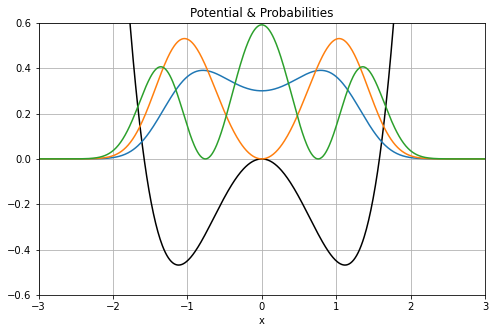

In [79]:
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return (x**2 - 2.5)*x**2

hbar = 1
m = 1
a = 10
N = 1000 

x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] 
V = Vpot(x)

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)
E,psi = np.linalg.eigh(H)
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2)
plt.plot(x,(psi[1])**2)
plt.plot(x,(psi[2])**2)
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()

Comunque, dato che il problema è già risolto, può servire da banco di prova per testare metodi di ricerca dell'ottimo, cioè del minimo di una funzione costo che è il valore atteso dell'energia mediata su opportune funzioni di prova.

Il potenziale cui la particella è sottoposta ha due minimi.
Fisicamente, supponiamo che nello stato fondamentale, la particella abbia velocità nulla. Pertanto, classicamente giace in una delle due buche. Nel regime quantistico, possiamo supporre che la particella giaccia in una delle due buche con eguale probabilità. Pertanto, e alla luce della soluzione trovata numericamente, scegliamo di restringere la ricerca del minimo a funzioni di prova così fatte:
$$
\Psi^{\mu,\sigma}(x) =
    \Psi_0\left( e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
    e^{-\frac{(x+\mu)^2}{2\sigma^2}}\right)
$$
dove $\mu$ è la posizione dei minimi in valore assoluto, e $\sigma>0$ è proporzionale alla larghezza della buca. Affinché $\int|\Psi|^2dx=1$, $\Psi_0$ deve soddisfare
\begin{eqnarray}
\Psi_0^{-1}&=& \int_{-\infty}^\infty\left( e^{-\frac{(x-\mu)^2}{2\sigma^2}}+e^{-\frac{(x+\mu)^2}{2\sigma^2}}\right)^2dx\\
~
&=&3.54491~\sigma~(1+e^{-\frac{\mu^2}{\sigma^2}})
\end{eqnarray} 
(integrale calcolato con Wolphram Mathematica). Questa scelta di funzioni di prova restringe la ricerca a uno spazio molto più piccolo. Infatti abbiamo ora solamente due parametri, la posizione media $\mu$ e lo scostamento medio $\sigma$ della particella rispetto ai minimi del potenziale, nei quali ricercare il minimo della funzione costo
\begin{eqnarray}
H(\mu,\sigma) =-\frac{1}{2}\int_{-\infty}^\infty
    \{\Psi^{\mu,\sigma~*}\Psi^{\mu,\sigma}~''
    +(-2x^4+5x^2)|\Psi^{\mu,\sigma}|^2\}~dx
\end{eqnarray}

Per la derivata seconda si ottiene:

\begin{eqnarray}
\Psi^{\mu,\sigma}(x)''&=&
\frac{1}{\sigma^4}\Bigg\{\Psi^{\mu,\sigma}(x)~(\mu^2-\sigma^2+x^2)+
~
-2~\mu~x~\Psi_0
~
\left( e^{-\frac{(x-\mu)^2}{2\sigma^2}}-e^{-\frac{(x+\mu)^2}{2\sigma^2}}\right)\Bigg\}\\
~
&=&\frac{1}{\sigma^4}~\Psi^{\mu,\sigma}(x)~\Bigg\{\mu^2-\sigma^2+x^2-2~\mu ~x~\text{tanh}\left(\frac{\mu x}{\sigma^2}\right)\Bigg\}
\end{eqnarray} 
dove abbiamo usato l'utile identità:
\begin{eqnarray}
\frac{
     e^{-\frac{(x-\mu)^2}{2\sigma^2}}-
    e^{-\frac{(x+\mu)^2}{2\sigma^2}}
}{
     e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
    e^{-\frac{(x+\mu)^2}{2\sigma^2}}
}=\text{tanh}\left(\frac{\mu x}{\sigma^2}\right)
\end{eqnarray}




Pertanto, per la funzione costo si trova la seguente forma:
\begin{eqnarray}
H(\mu,\sigma)&=&-\frac{1}{2}\int_{-\infty}^\infty
    \{\Psi^{\mu,\sigma~*}\Psi^{\mu,\sigma}~''
    +(-2x^4+5x^2)|\Psi^{\mu,\sigma}|^2\}dx\\
    ~
    &=&-\frac{1}{2}\int_{-\infty}^\infty
     |\Psi^{\mu,\sigma}|^2
     \Bigg\{\sigma^{-4}
    \Bigg( \mu^2-\sigma^2+x^2-2~\mu ~x~\text{tanh}
      \left(\frac{\mu x}{\sigma^2}\right)\Bigg)
        -2x^4+5x^2\Bigg) 
       \Bigg\}
   dx\\
   ~
   &=&\frac{\sigma^2-\mu^2}{2\sigma^4}+\int_{-\infty}^\infty
   |\Psi^{\mu,\sigma}|^2
   \Bigg(
   x^4-\frac{5+\sigma^{-4}}{2}x^2+
   \frac{\mu x}{\sigma^4}\text{tanh}\left(\frac{\mu x}{\sigma^2}\right)
   \Bigg)dx\\
   ~
   &=&\frac{\sigma^2-\mu^2}{2\sigma^4}+
   \frac{0.282095}{\sigma(1+e^{-\mu^2/\sigma^2})}
   \int_{-\infty}^\infty
   \left( e^{-\frac{(x-\mu)^2}{\sigma^2}}+
   e^{-\frac{(x+\mu)^2}{\sigma^2}}
  + e^{-\frac{x^2+\mu^2}{\sigma^2}}
   \right)\cdot\\&&\cdot
   \Bigg(
   x^4-\frac{5+\sigma^{-4}}{2}x^2+
   \frac{\mu x}{\sigma^4}\text{tanh}\left(\frac{\mu x}{\sigma^2}\right)
   \Bigg)dx
\end{eqnarray}

Si tratta dunque di trovare il valore minimo della funzione costo $H(\mu,\sigma)$ nei parametri $\mu$ e $\sigma$.
Dal momento che disegnarla punto per punto è troppo costoso computazionalmente, vi sono algoritmi, come il raffreddamento simulato, che permettono di esplorare il panorama energetico in modo efficiente.


### Algoritmo di raffreddamento simulato

Nell'algoritmo di raffreddamento simulato, il minimo della funzione costo assegnata viene trovato discendendo stocasticamente il gradiente. Inoltre, nella ricerca, ciascuna configurazione del sistema con energia $H(\mu,\sigma)$ è pesata con il peso di Boltzmann

\begin{eqnarray}
e^{-H(\mu,\sigma)/T}
\end{eqnarray}

ciò che rende altamente improbabile visitare configurazioni con energie molto diverse dal minimo.

In effetti, la stocasticità è già di per sé sufficiente a liberare l'algoritmo dai minimi metastabili nei quali potrebbe rimanere intrappolato in una discesa del gradiente classica. Tuttavia, con un contributo casuale fisso, c'è il rischio che l'algoritmo continui a saltare tra vari minimi locali, senza riuscire a trovare immediatamente il minimo assoluto, se il panorama energetico è molto frastagliato. Per questo motivo, in aggiunta, la discesa stocastica del gradiente è temperata diminuendo progressivamente il parametro $T$. 


Quest'idea fa riferimento alla termodinamica. Una sostanza può essere descritta da un insieme canonico di possibili configurazioni. Se la sua temperatura non è troppo alta, la natura trova quasi istantaneamente, tra una miriade di possibili configurazioni del sistema, quella che rende minima la sua energia. È quindi una buona idea rifarsi alla termodinamica per trovare un algoritmo efficiente di ricerca dell'ottimo.

Il raffreddamento è un concetto presente nella lavorazione dei metalli e delle leghe. Si può confrontare con il trattamento di tempra, che consiste nell'arroventare una sostanza, e poi raffreddarla rapidissimamente. In questo caso le molecole che compongono la sostanza non hanno il tempo di ricondursi alla configurazione che equilibra la sostanza all'energia minima, bensì vengono congelate in uno stato altamente disordinato. Questo garantisce alla sostanza, ad esempio una spada in ferro, una maggiore durezza e rigidità agli urti, ma anche una maggior suscettibilità alle fratture.

Viceversa, il raffreddamento viene operato in maniera estremamente lenta, di modo che le molecole abbiano tutto il tempo di riorganizzarsi nel mentre: il processo è adiabatico, cioè in ogni istante la sostanza è quasi all'equilibrio. Questo processo consente di eliminare i difetti presenti nei materiali, che possono esserci in seguito a dislocazioni delle molecole rispetto alle loro posizioni nella configurazione di equilibrio. Ciò corrisponde, nell'algoritmo, alla possibilità di uscire dai minimi locali e arrivare infine nel minimo globale.

In effetti, diminuendo progressivamente la temperatura, i salti casuali tra un minimo e l'altro si ridimensionano sempre di più, e si va a finire nel minimo globale. Si veda la seguente immagine tratta dalla pagina Wikipedia sul Simulated Annealing.

![Image Title](https://upload.wikimedia.org/wikipedia/commons/d/d5/Hill_Climbing_with_Simulated_Annealing.gif)